In [1]:
import tensorflow as tf
import keras
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = "../../bee/videos/C02_170622120000.mp4"

def resize_pred(p):
    return cv2.resize(p, (p.shape[1]*8, p.shape[0]*8 ))

def input_preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return cv2.resize(image, (image.shape[1]//4, image.shape[0]//4 ))

Using TensorFlow backend.


In [2]:
vid = cv2.VideoCapture(path)
ret_, frame =  vid.read()
vid.release()

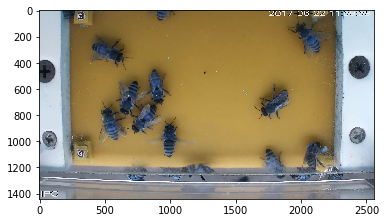

In [3]:
plt.imshow(frame)

In [4]:
model = load_model("../new_weights/Inference_model.h5")

/home/jchan/anaconda3/envs/beepose/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
# model.summary()

In [6]:
x = input_preprocess(frame)

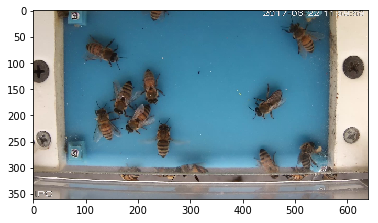

In [7]:
plt.imshow(x)

In [8]:
pred = model.predict(np.array([x]))

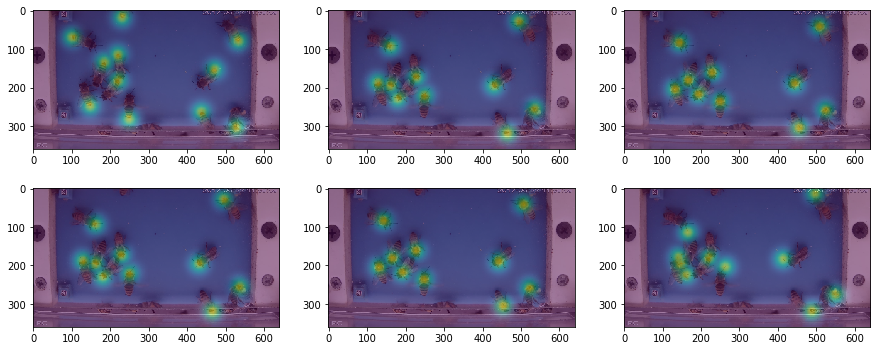

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i in range(2):
    for j in range(3):
        p = resize_pred(pred[1][0, :, :, i+j])
        ax[i, j].imshow(x)
        ax[i, j].imshow(p, alpha=0.5)

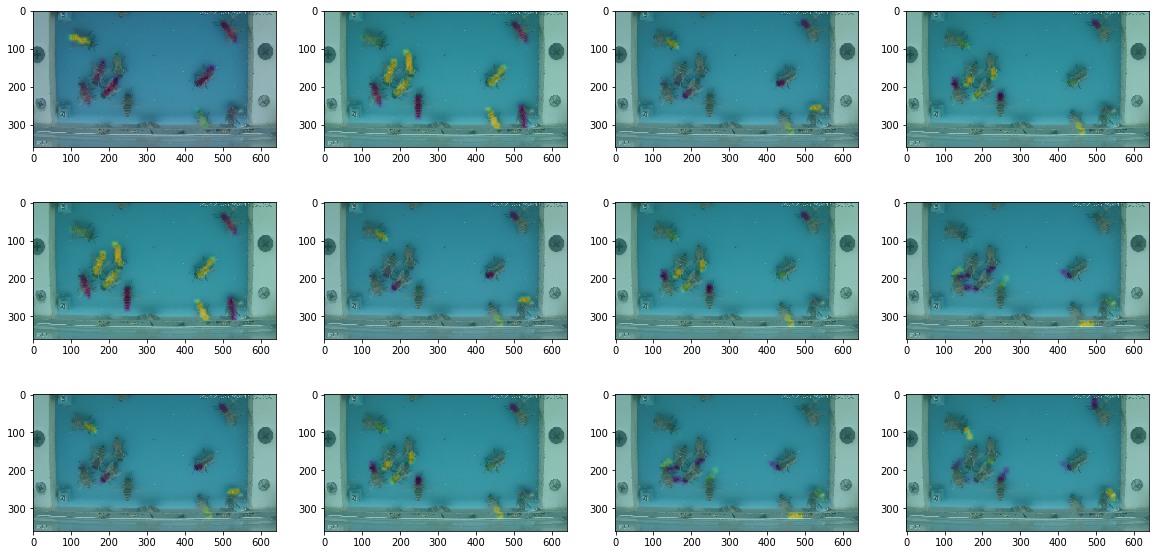

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for i in range(3):
    for j in range(4):
        p = resize_pred(pred[0][0, :, :, i+j])
        ax[i, j].imshow(x)
        ax[i, j].imshow(p, alpha=0.5)